In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import librosa
import librosa.display
import os

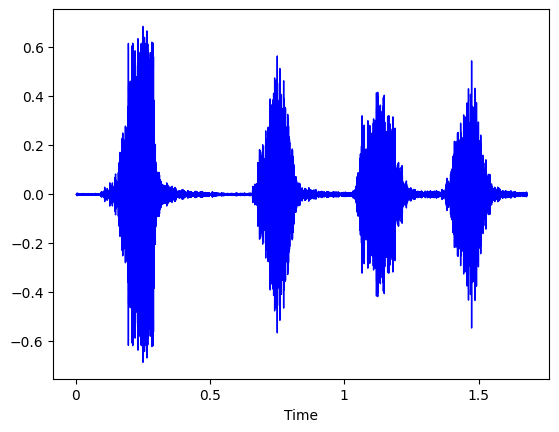

In [2]:
FILENAME = "bark.wav"

librosa_audio_data, librosa_sample_rate = librosa.load(FILENAME)
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate, color = "blue")

In [3]:
# Loading the metadata 

metadata = pd.read_csv("UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")

metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [4]:
# Checking if the dataset is balanced or not 

metadata["class"].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

## Extracting Features 

Here we will be using Mel-Frequency Cepstral Coefficients (MFCC) from the audio samples. The MFCC summarises the frequence distribution across the window size, so it is possible to analyze both the frequency and characterstics of the sound. These audio representations will allow us to identify features for classification

In [5]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc=40)

print(mfccs.shape)

(40, 73)


In [6]:
mfccs

array([[-4.92297272e+02, -4.75054657e+02, -4.75254913e+02, ...,
        -3.97302856e+02, -4.12189819e+02, -4.33255920e+02],
       [ 7.39831848e+01,  7.58931046e+01,  7.31992188e+01, ...,
         1.26724915e+02,  1.19925041e+02,  1.08599457e+02],
       [ 2.51829643e+01,  1.96938095e+01,  1.80576859e+01, ...,
        -5.74281812e-01, -1.63246110e-01,  5.04161978e+00],
       ...,
       [ 3.00478888e+00,  3.71383500e+00,  3.80284643e+00, ...,
         4.47916985e-01,  7.36044109e-01,  4.10818243e+00],
       [ 4.93726444e+00,  4.03950024e+00,  3.40298915e+00, ...,
         2.87281728e+00,  2.34909701e+00,  2.91369009e+00],
       [ 4.15801907e+00,  6.22881651e+00,  3.87448359e+00, ...,
        -1.16615415e+00,  3.34697342e+00,  1.65836370e+00]], dtype=float32)

In [7]:
AUDIO_DATASET_PATH = 'UrbanSound8K/UrbanSound8K/audio'

In [8]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [9]:
def features_extractor(file): 
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [11]:

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(AUDIO_DATASET_PATH),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3555it [03:33, 17.45it/s]c:\Users\athar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [08:05, 24.73it/s]c:\Users\athar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [08:05, 28.14it/s]c:\Users\athar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [08:58, 16.22it/s]


In [12]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [15]:
# Splitting into dependent and independent features 

X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = np.array(pd.get_dummies(y))

In [19]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.shape

(6985, 40)

In [23]:
X_test.shape

(1747, 40)